In [1]:
import pandas as pd
import numpy as np
#https://stackoverflow.com/questions/38783027/jupyter-notebook-display-two-pandas-tables-side-by-side
from itertools import chain,cycle
from IPython.display import display, HTML, display_html
import matplotlib.pyplot as plt

display(HTML("<style>.container { width:100% !important; }</style>"))
display(HTML("<style>.output_result { max-width:100% !important; }</style>"))
display(HTML("<style>.prompt { display:none !important; }</style>"))

In [2]:
%matplotlib notebook
"""
https://nbviewer.org/ copy and paste URL address at 
this link in order to have a reliable view of the code
"""
plt.rcParams [ 'axes.labelsize' ] = 14
plt.rcParams [ 'lines.linewidth' ] = 2
plt.rcParams [ 'figure.figsize' ] = ( 12 , 4)
plt.rcParams [ 'font.size' ] = 9




class plotSett:
    def __init__(self, fig, plt = plt, font = 20, title = 'Title', fontx = None, fonty = None):
        self.font = font
        self.title = title
        self.fig = fig
        self.ax = self.fig.add_subplot(111)
        
        if fontx == None:
            fontx = self.font
        if fonty == None:
            fonty = self.font
        

        self.ax.set_title(title, fontdict={'fontsize': self.font })
        self.ax.xaxis.set_tick_params(labelsize = fontx)
        self.ax.yaxis.set_tick_params(labelsize = fonty)
        
    def grid(self, xmin = 0, xmax = 1, xstepM = 0.1, xstepm = 0.05, \
             ymin = 0, ymax = 1, ystepM = 0.1, ystepm = 0.05,\
             sizeMinor = 0.2, sizeMajor = 1): # line size

        Xmajor_ticks = np.arange(xmin, xmax, xstepM)
        Xminor_ticks = np.arange(xmin, xmax, xstepm)
        Ymajor_ticks = np.arange(ymin, ymax, ystepM)
        Yminor_ticks = np.arange(ymin, ymax, ystepm)

        self.ax.set_xlim(xmin, xmax)
        self.ax.set_xticks(Xmajor_ticks)
        self.ax.set_xticks(Xminor_ticks, minor=True)
    
        self.ax.set_ylim(ymin, ymax)
        self.ax.set_yticks(Ymajor_ticks)
        self.ax.set_yticks(Yminor_ticks, minor=True)

        # And a corresponding grid
        #self.ax.grid(which='both')
        self.ax.grid(which='minor', alpha=0.2)
        self.ax.grid(which='major', alpha=0.5)

In [3]:
def dfDisplay(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2 style="text-align: center;">{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

In [4]:
def AdalineGD(object):
    """ADAptive LInear NEuron classifier.
    
    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.
        
    Attributes
    ------------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.
        
    """
    
    def __init__(self, eta = 0.01, n_iter = 50):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        """ Fit training data.
        
        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors,
            where n_samples is the number of samples and 
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.
            
        Returns
        ----------
        self : object
        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            output = self.net_input(x)
            errors = (y - output)
            self.w_[1:] += self.eta *X.T.dot(errors)
            self.w_[0] += self.eta * errors_sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        return self.net_input(X)
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)

<IPython.core.display.Javascript object>


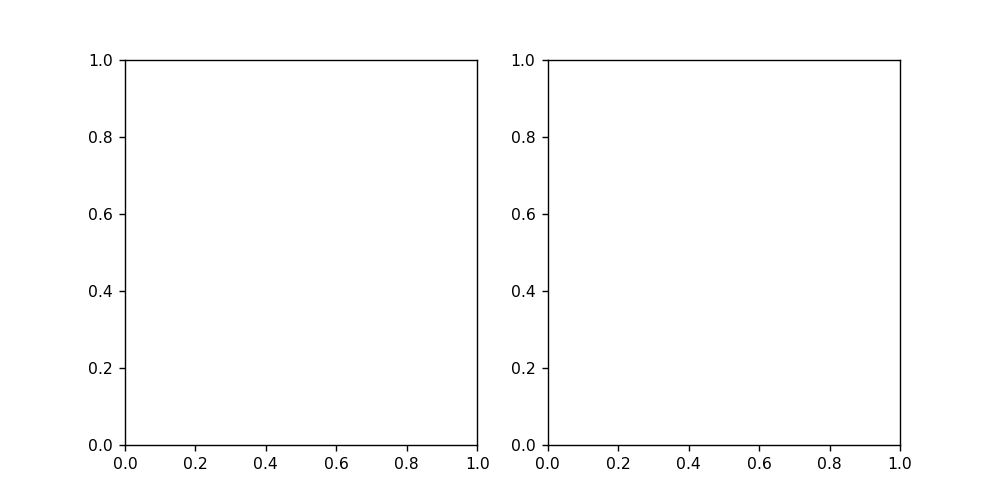

TypeError: AdalineGD() got an unexpected keyword argument 'n_iter'

In [5]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (8, 4))
ada1 = AdalineGD(n_iter = 10, eta = 0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1 ),
          np.log10(ada1.cost_), marker = 'o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline Learning rate 0.01')
ada2 = AdalineGD(n_iter=10, eta = 0.0001).fit(X, y)
ax[1].plot( range(1, len(ada2.cost_) + 1), ada2.cost_, marker = 'o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')
plt.show()